# Scaling Exercises

Do your work for these exercises in a jupyter notebook named `scaling`. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

- 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
- 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?
- 3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.
- 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?
- 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

import acquire, wrangle

Use function from wrangle module to load Pandas DataFrame.

In [2]:
df = wrangle.wrangle_telco()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 5348 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1685 non-null   object 
 1   tenure           1685 non-null   int64  
 2   monthly_charges  1685 non-null   float64
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [4]:
df.describe()

,tenure,monthly_charges,total_charges
count,1685.00000,1685.000000,1685.000000
mean,57.07181,60.872374,3728.933947
std,17.72913,34.712210,2571.252806
min,1.00000,18.400000,20.350000
25%,48.00000,24.050000,1278.800000
50%,64.00000,64.450000,3623.950000
75%,71.00000,90.550000,5999.850000
max,72.00000,118.750000,8672.450000


## Applying the scalars

In [5]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [6]:
# First step is to split the data
train, test = train_test_split(df, train_size=0.8, random_state=1349)
train, validate = train_test_split(train, train_size=0.7, random_state=1349)
train.shape, validate.shape, test.shape

((943, 4), (405, 4), (337, 4))

In [7]:
# create our scaler

scaler_tenure = MinMaxScaler()
scaler_monthlycharges = MinMaxScaler()
scaler_totalcharges = MinMaxScaler()

In [8]:
# fit our scaler

scaler_tenure.fit(train[['tenure']])
scaler_monthlycharges.fit(train[['monthly_charges']])
scaler_totalcharges.fit(train[['total_charges']])

MinMaxScaler()

In [9]:
# use our scaler

train['tenure_minmax'] = scaler_tenure.transform(train[['tenure']])
train['monthly_charges_minmax'] = scaler_monthlycharges.transform(train[['monthly_charges']])
train['total_charges_minmax'] = scaler_totalcharges.transform(train[['total_charges']])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 5718 to 5968
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             943 non-null    object 
 1   tenure                  943 non-null    int64  
 2   monthly_charges         943 non-null    float64
 3   total_charges           943 non-null    float64
 4   tenure_minmax           943 non-null    float64
 5   monthly_charges_minmax  943 non-null    float64
 6   total_charges_minmax    943 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 58.9+ KB


In [11]:
train.describe()

,tenure,monthly_charges,total_charges,tenure_minmax,monthly_charges_minmax,total_charges_minmax
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,56.934252,61.357794,3745.975398,0.787806,0.431322,0.430721
std,17.707578,34.977622,2585.465674,0.249403,0.353667,0.298906
min,1.000000,18.700000,20.350000,0.000000,0.000000,0.000000
25%,48.000000,24.175000,1273.075000,0.661972,0.055359,0.144828
50%,64.000000,64.950000,3707.600000,0.887324,0.467644,0.426284
75%,71.000000,90.450000,5994.075000,0.985915,0.725480,0.690624
max,72.000000,117.600000,8670.100000,1.000000,1.000000,1.000000


The distributions look the same but the x axis on the scaled graph goes from 0 to 1.

In [12]:
originals = [train.tenure, train.monthly_charges, train.total_charges]
new = [train.tenure_minmax, train.monthly_charges_minmax, train.total_charges_minmax]

Text(0.5, 1.0, 'Scaled')

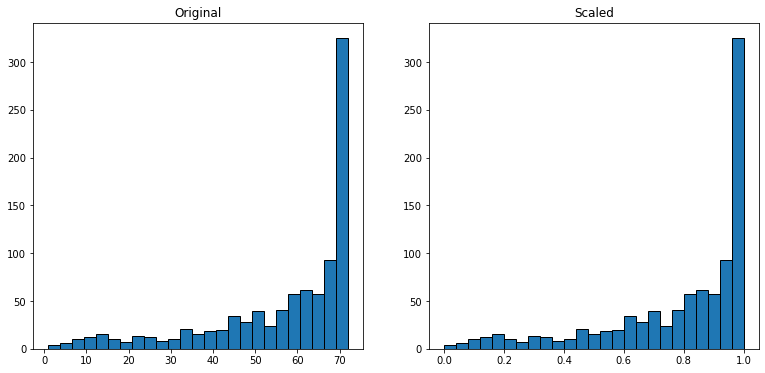

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[0], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(new[0], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

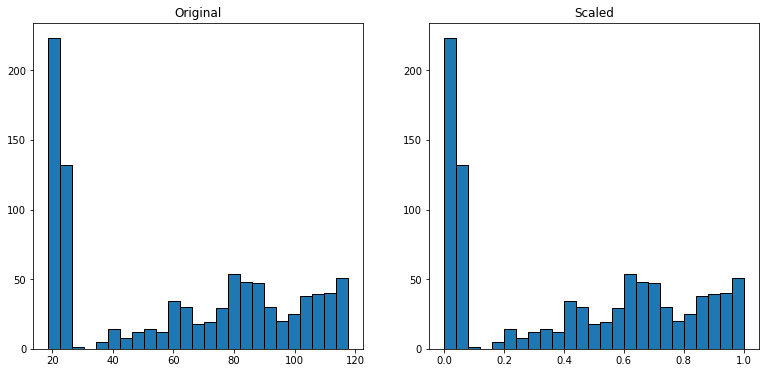

In [14]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[1], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(new[1], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

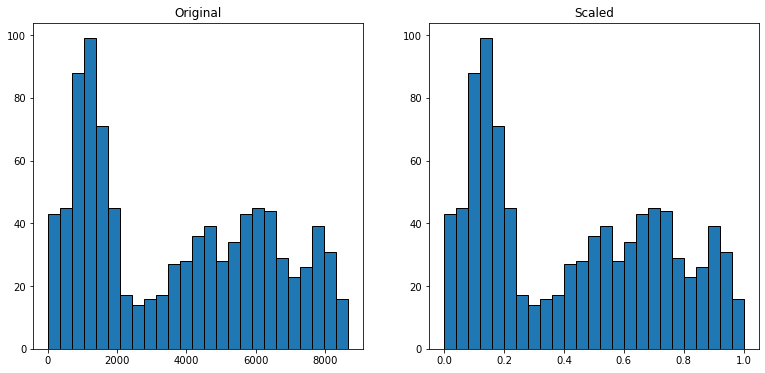

In [15]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[2], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(new[2], bins=25, ec='black')
plt.title('Scaled')

If we want to undo the scaling, we can use inverse_transform.

In [16]:
train.tenure_minmax = scaler_tenure.inverse_transform(train[['tenure_minmax']])

In [17]:
train.tenure_minmax.describe()

count    943.000000
mean      56.934252
std       17.707578
min        1.000000
25%       48.000000
50%       64.000000
75%       71.000000
max       72.000000
Name: tenure_minmax, dtype: float64

Note that min and max are like they were originally.

In [18]:
train.tenure_minmax = scaler_tenure.transform(train[['tenure_minmax']])

### Quantile transformer

In [19]:
quant_tenure = QuantileTransformer(output_distribution='normal')

In [20]:
quant_tenure.fit(train[['tenure']])

QuantileTransformer(output_distribution='normal')

In [21]:
train['tenure_quant'] = quant_tenure.transform(train[['tenure']])

In [22]:
quant_monthly_charges = QuantileTransformer(output_distribution='normal')
train['monthly_charges_quant'] = quant_monthly_charges.fit_transform(train[['monthly_charges']])

In [23]:
quant_total_charges = QuantileTransformer(output_distribution='normal')
train['total_charges_quant'] = quant_total_charges.fit_transform(train[['total_charges']])

In [24]:
quants = [train.tenure_quant, train.monthly_charges_quant, train.total_charges_quant]

Text(0.5, 1.0, 'Scaled')

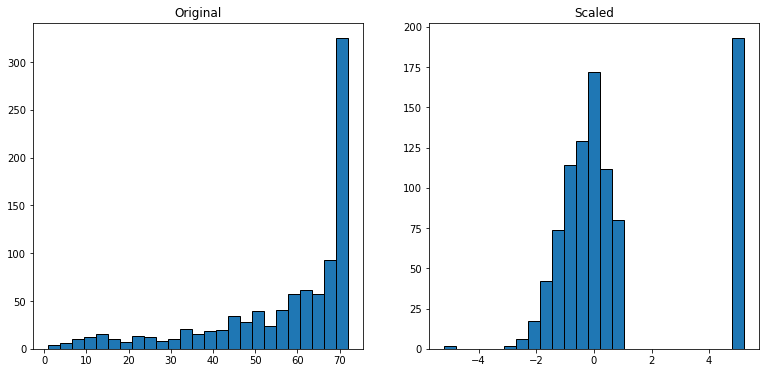

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[0], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[0], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

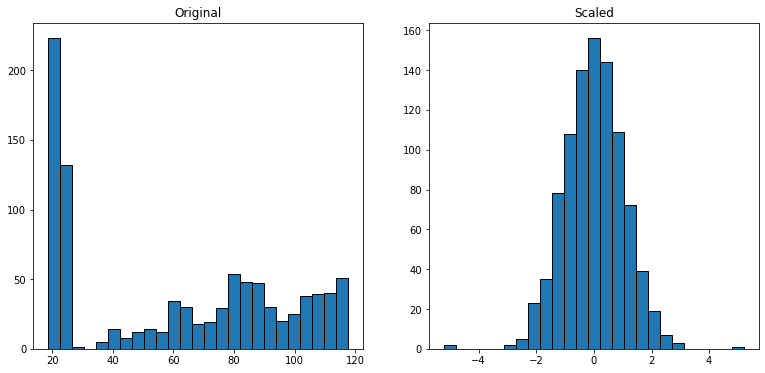

In [26]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[1], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[1], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

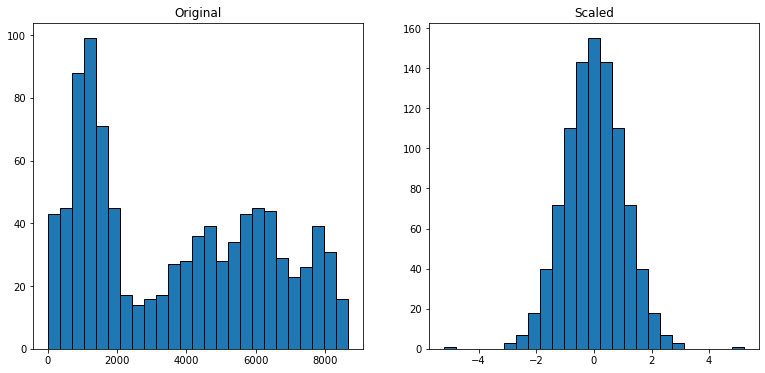

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[2], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[2], bins=25, ec='black')
plt.title('Scaled')

Now without the output_distribution argument.

In [28]:
quant_tenure = QuantileTransformer()

In [29]:
quant_tenure.fit(train[['tenure']])

QuantileTransformer()

In [30]:
train['tenure_quant'] = quant_tenure.transform(train[['tenure']])

In [31]:
quant_monthly_charges = QuantileTransformer()
train['monthly_charges_quant'] = quant_monthly_charges.fit_transform(train[['monthly_charges']])

In [32]:
quant_total_charges = QuantileTransformer()
train['total_charges_quant'] = quant_total_charges.fit_transform(train[['total_charges']])

In [33]:
quants = [train.tenure_quant, train.monthly_charges_quant, train.total_charges_quant]

Text(0.5, 1.0, 'Scaled')

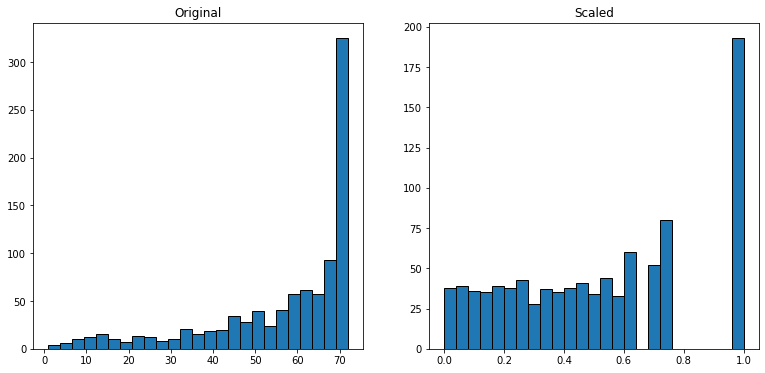

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[0], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[0], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

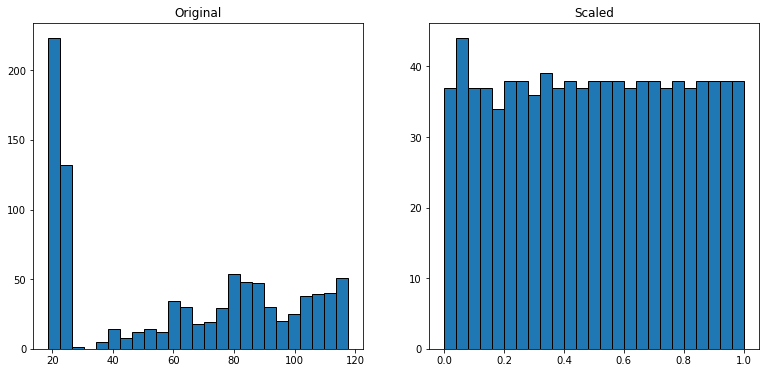

In [35]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[1], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[1], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

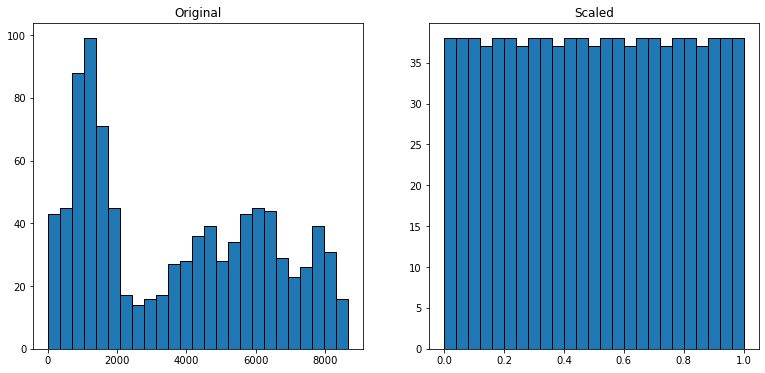

In [36]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(originals[2], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(quants[2], bins=25, ec='black')
plt.title('Scaled')

It seems like when you omit the output_distribution argument, it will scale the data to a uniform distribution. This makes sense since when you look at the documentation, the default for output_distribution is 'uniform.'

In [37]:
import prepare

In [38]:
train, validate, test = prepare.prep_telco_data(wrangle.wrangle_telco())

In [39]:
train.shape

(943, 4)

In [40]:
train, validate, test = prepare.scale_telco_data(train, validate, test)

In [41]:
train.describe()

,tenure,monthly_charges,total_charges
count,943.000000,943.000000,943.000000
mean,0.787806,0.431322,0.430721
std,0.249403,0.353667,0.298906
min,0.000000,0.000000,0.000000
25%,0.661972,0.055359,0.144828
50%,0.887324,0.467644,0.426284
75%,0.985915,0.725480,0.690624
max,1.000000,1.000000,1.000000


In [42]:
validate.describe()

,tenure,monthly_charges,total_charges
count,405.000000,405.000000,405.000000
mean,0.782507,0.437791,0.434390
std,0.251579,0.346952,0.294537
min,0.042254,-0.001517,0.005601
25%,0.661972,0.056117,0.154450
50%,0.887324,0.478261,0.435718
75%,0.985915,0.751769,0.687372
max,1.000000,1.011628,1.000272


In [43]:
test.describe()

,tenure,monthly_charges,total_charges
count,337.000000,337.000000,337.000000
mean,0.803862,0.399008,0.416460
std,0.248489,0.347889,0.296453
min,0.028169,-0.003033,0.011156
25%,0.690141,0.021739,0.145368
50%,0.915493,0.412538,0.389479
75%,0.985915,0.719414,0.696246
max,1.000000,1.010617,0.985786


Scale on validate and test is not going to be 0 to 1 anymore because it's not exactly the same data.